# Facial Recognition & Analysis

The purpose of the below exercise is to train a pipeline, tune the parameters, and perform prediction with the best model. More specifically, I am completing the following tasks: 

1. Develop a pipeline with feature extraction and linear regression models  
2. Perform grid search with the pipeline for optimizing some hyper-parameters
3. Evaluate the best model's performance
4. Identify the second best model 


I will be using a face dataset.

## Face Data

(from SciKit Learn Docs)

This dataset is a collection of JPEG pictures of famous people collected over the internet, 
all details are available on the official website:

  *  http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. 
The typical task is called Face Verification: 
given a pair of two pictures, 
a binary classifier must predict whether the two images are from the same person.

An alternative task, 
Face Recognition or Face Identification is: 
given the picture of the face of an unknown person, 
identify the name of the person by referring to a gallery of previously seen pictures of identified persons.

Both Face Verification and Face Recognition are tasks that are typically 
performed on the output of a model trained to perform Face Detection. 
The most popular model for Face Detection is called Viola-Jones and is 
implemented in the OpenCV library. 
The LFW faces were extracted by this face detector from various online websites.

---

# Import libs

In [1]:
# Import all the libs you need:

from time import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load necessary libraries
from sklearn.datasets import load_digits, fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline


# Load the Dataset
Load the dataset from sklearn datasets using `fetch_lfw_people`. Print the number of samples, features, and  classes.

In [2]:
# load the dataset:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


# Visualize Some Sample Images
Randomly sample 9 images from the dataset and visualize them in a 3X3 grid with their labels. 

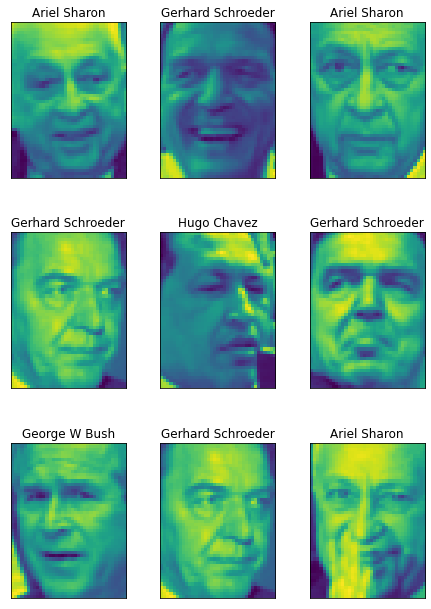

In [3]:
# visualize using matplot lib

from matplotlib import pyplot
import numpy as np

row = 3
col = 3
total_sample = len(lfw_people.data)

pyplot.subplots_adjust(bottom=0, left=.01, right=.99, top=2, hspace=.35)


for i in range(row*col):
    pyplot.subplot(row, col, i+1)
    random_index = np.random.randint(0, total_sample)
    single_label = np.copy(lfw_people.data[random_index, :])
    single_label = single_label.reshape((h,w))
    pyplot.title(target_names[lfw_people.target[random_index]], size=12)
    pyplot.xticks(())
    pyplot.yticks(())
    pyplot.imshow(single_label)

# Split the dataset
Split the dataset into train (75%) and test (25%).

In [4]:
# split the dataset (E001)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


# Build a Pipeline

Now we build a pipeline that performs feature extraction with PCA followed by classification using logistic regression. While developing the pipeline, we perform the following tasks. 

1. For PCA vary the `n_components` parameter and for logistic regression vary the regularization parameter `C`. Use at least 5 different values for each of these parameters. 
2. Use 10-fold cross validation while using the gridsearch


Note: If LogisticRegression doesn't converge increase the value for `max_iter`. 

## Define the pipeline


In [5]:
# Define the pipeline (E002)

pca_components = 160

pca = PCA(n_components = pca_components)
regr = LogisticRegression(solver = 'liblinear', max_iter=10000)

pipe = Pipeline([('PCA', pca), ('regr', regr)])


## Configure the Parameters for Grid Search

In [6]:
# Configure the parameters for grid search (E003)

param_grid = {'PCA__n_components': [30, 40, 50, 60, 80],
             'regr__C': np.logspace( -8, -4, 4, 6, 8)}



## Train the Pipeline with Grid Search

In [7]:
# Train the Pipeline with Grid Search (E004)

model_grid = GridSearchCV(pipe, param_grid, cv = 10, n_jobs = 1)

model_grid = model_grid.fit(X_train, y_train)

Once the pipline is fitted, we can address the following tasks. 

## Show the parameters of the trained models and their rankings within this pipeline

In [8]:
# Show the parameters of the trained models and their rankings in a table (E005)
print(model_grid.cv_results_)



{'mean_fit_time': array([0.57643533, 0.66326063, 0.70068877, 0.95895863, 1.15279813,
       0.95241847, 1.2057282 , 1.17297335, 1.38991013, 1.16662025,
       1.348648  , 1.43268943, 1.58813674, 1.71636734, 1.32885668,
       1.3845794 , 2.1133405 , 2.21043482, 2.21922753, 2.34172902]), 'std_fit_time': array([0.21267791, 0.16922071, 0.16886146, 0.36604799, 0.29168096,
       0.29806358, 0.3309829 , 0.3274083 , 0.32398161, 0.15953755,
       0.27167074, 0.3656395 , 0.45580303, 0.36711019, 0.18115957,
       0.15730581, 0.37546533, 0.42156829, 0.52700096, 0.34983195]), 'mean_score_time': array([0.02490685, 0.02466362, 0.0095053 , 0.00160654, 0.00175257,
       0.01737559, 0.00169213, 0.00168192, 0.00169919, 0.00171084,
       0.00176454, 0.00174575, 0.04019651, 0.00184705, 0.00172153,
       0.00184629, 0.00264144, 0.00255733, 0.00261581, 0.00261087]), 'std_score_time': array([3.51553910e-02, 3.52665616e-02, 2.31888401e-02, 8.52450985e-05,
       4.11353280e-04, 3.14231781e-02, 1.3028352

## Show the parameters of the best model

In [71]:
# Show the best model's parameters (E006)
print(model_grid.best_params_)


{'PCA__n_components': 80, 'regr__C': 0.000244140625}


## Show the parameters of the second best model

In [14]:
# Show the parameters of the second best model (E007)
rank = model_grid.cv_results_['rank_test_score']

rep = np.argsort(rank)[::-1]

#get_params(rep)

#print(rep)

#df1 = pd.DataFrame(rep).astype(str)

#def get_params(): 
#return get_params()

#model_grid.iloc[1]
#print(df1)

#def get_params(cv_results_, deep = True): 
#    for rep indices
#    return rep.get_params(deep = deep)

#sec_best = pipe[1].get_params(True)
#print(sec_best)


rank_tbl = pd.DataFrame(
    {
        'Model': model_grid.cv_results_['params'],
        'Mean Test Score': model_grid.cv_results_['mean_test_score'],
        'Std Test Score': model_grid.cv_results_['std_test_score'],
        'Rank': model_grid.cv_results_['rank_test_score']
    }
)

rank_tbl.loc[[19]].sort_values('Rank')

#print(rank_tbl.loc[[19]])

#Parameters for second best model are number 4

,Model,Mean Test Score,Std Test Score,Rank
19,"{'PCA__n_components': 80, 'regr__C': 0.0002441...",0.798121,0.059103,2


## Show the mean and stddev of the test scores (i.e CV scores) for the second best model

In [15]:
# Show the mean and stddev of the test scores (i.e CV scores) for the second best model (E008)
rank_tbl.loc[[19]].sort_values('Rank')

,Model,Mean Test Score,Std Test Score,Rank
19,"{'PCA__n_components': 80, 'regr__C': 0.0002441...",0.798121,0.059103,2


## Evaluate the best model using the test data

Perform the following tasks: 

1. Make prediction
1. Show confusion matrix
1. Show classification task

In [58]:
# Make prediction (E009)

y_pred = model_grid.predict(X_test)


In [59]:
# Show confusion matrix (E010)
pd.DataFrame(confusion_matrix(y_test, y_pred))


,0,1,2,3,4,5,6
0,12,3,1,0,0,0,1
1,3,44,0,5,0,0,4
2,1,2,25,5,1,2,0
3,1,6,8,112,1,2,1
4,1,2,3,0,23,0,1
5,0,1,0,1,3,10,4
6,0,2,0,4,1,0,26


In [60]:
# Show the classification report (E011)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.73      0.79      0.76        56
           2       0.68      0.69      0.68        36
           3       0.88      0.85      0.87       131
           4       0.79      0.77      0.78        30
           5       0.71      0.53      0.61        19
           6       0.70      0.79      0.74        33

    accuracy                           0.78       322
   macro avg       0.74      0.73      0.73       322
weighted avg       0.79      0.78      0.78       322



# This is the end of the notebook.`